# Casa meva es casa teva...

Aquesta visualitzacio vol mostrar la presencia de places turistiques a l'illa de Mallorca.

La idea esta inspirada en un tuit de n'[Aina Ginard](https://twitter.com/terraferida/status/1566781070883930114?s=12&t=tH5yHxOBZJd_qUAKgLVHoA), on ensenyava la distribucio de places d'hotel i de lloguer vacacional pel territori mallorqui. 

------------------------------------------------------------------------------

In [1]:
%run setup.ipynb

## Replica del tuit (aka AINADA 3.0)

In [2]:
variable = 'ratio_population'

t_list = ["Stamen Terrain", "Stamen Toner","stamenwatercolor", 'cartodbpositron']
map0 = folium.Map(location=[39.6953, 3.0176],
                        tiles = 'cartodbpositron', 
                        zoom_start = 9.4)

folium.TileLayer('Stamen Terrain').add_to(map0)
folium.TileLayer('stamenwatercolor').add_to(map0)

nbins = 8
# There are two outlier municipalities (StLlorenc, SesSalines), so I am giving them
# an specific bin (from 0.95 to 1)
bins = list(np.linspace(0,1, nbins+1))
bins = data[variable].quantile(bins).tolist()
folium.Choropleth(geo_data=gdf1_json,
                  name="choropleth",
                  data=data.reset_index(),
                  columns=['mun_name', variable],
                  # key_on: holds the key which connects the geographic boundaries to the corresponding data 
                  key_on="feature.properties.mun_name",
                  fill_color="YlOrRd",
                  fill_opacity=0.8,
                  line_opacity=0.6,
                  legend_name="Places turistiques per cada 100 habitants",
                  bins = bins,
                 ).add_to(map0)


folium.LayerControl().add_to(map0)

# Display the Choropleth
map0

### Valors tuit:
- Places hotelers: 304710
- Places lloguer turistic: 103299
- Total places: 408009

- 44.73 places turistiques per cada 100 habitants

### Valors versio 3.0:

In [3]:
print('- Places hoteleres: {}'.format(data['pc_hotel'].sum()))
print('- Places lloguer turistic: {}'.format(data['pc_llvac'].sum()))
print('- Total places: {}'.format(data['pc_total'].sum()))

mean_vp100p_island = data.pc_total.sum()/data.pop_total.sum()*100
print('- {0:.4g} places turistiques per cada 100 habitants'.format(mean_vp100p_island))

- Places hoteleres: 304715
- Places lloguer turistic: 102939
- Total places: 407654
- 45.58 places turistiques per cada 100 habitants


Existeix alguna diferencia (errors copiant valors a ma) pero els valors encaixen forca.

# ...Si es que hi ha cases d'algu

No sorpren veure com les places turistiques s'acumulen a la costa. 

Existeix molta variabilitat en la metrica utilitzada, va desde valors de 2-3 places fins a 3200 places per 100 habitants en el cas de Sant Llorenc.

Aquesta seccio preten aprofundir una mica en quins factors afecten mes la distribucio de places. 

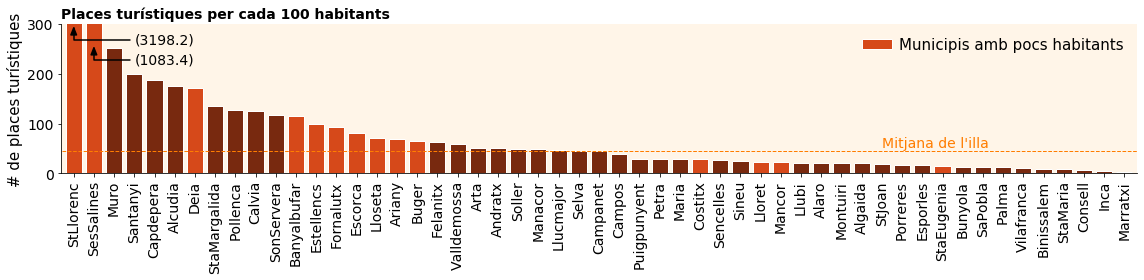

In [4]:
fig, ax = plt.subplots()

dataplot = data.set_index('mun_name').sort_values('vp100p', ascending = False)

color_list = [color3 if x else color31 for x in dataplot.large_pop.tolist()]

dataplot['vp100p'].plot.bar(figsize= (16,4),
                            ylim = (0,300), width=0.8,
                            ax = ax, color = color_list,
                            edgecolor = 'white', label = 'Municipis amb pocs habitants',)

ax.hlines(y=mean_vp100p_island, linewidth=1, xmin = -1000, xmax = 1000, color=color1, linestyles = 'dashed')
textsize = 14
ax.annotate("(3198.2)", xy=(0, 300), xycoords='data', xytext=(3, 260), textcoords='data',
            size = textsize, 
            arrowprops=dict(arrowstyle="-|>, head_width=0.2, head_length=0.5",
                            color='black',lw =  1.5,connectionstyle="angle,angleA=180,angleB=-90,rad=0"),
            )

ax.annotate("(1083.4)", xy=(1, 260), xycoords='data', xytext=(3, 220), textcoords='data',
            size = textsize, 
            arrowprops=dict(arrowstyle="-|>, head_width=0.2, head_length=0.5",
                            color='black',lw =  1.5,connectionstyle="angle,angleA=180,angleB=-90,rad=0"),
            )

ax.annotate("Mitjana de l'illa", xy=(40, mean_vp100p_island), xytext=(40, mean_vp100p_island),
            textcoords='data',  xycoords='data', va = 'bottom', 
            size = textsize, zorder = 0, color = color1)

ax.set_xlabel('')
ax.set_ylabel('# de places turístiques', size = 15)
ax.tick_params(axis='both', which='major', labelsize=14)

ax.set_facecolor(background_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Places turístiques per cada 100 habitants', loc = 'left', fontsize = 14,fontweight="bold")

lgd = ax.legend(frameon=False, fontsize = 15, ncol = 1, handletextpad=0.5, loc = 1)

fig.tight_layout()

#plt.show()
plt.savefig('./figs/figure_vp100p.png', dpi = 300, format = 'png')

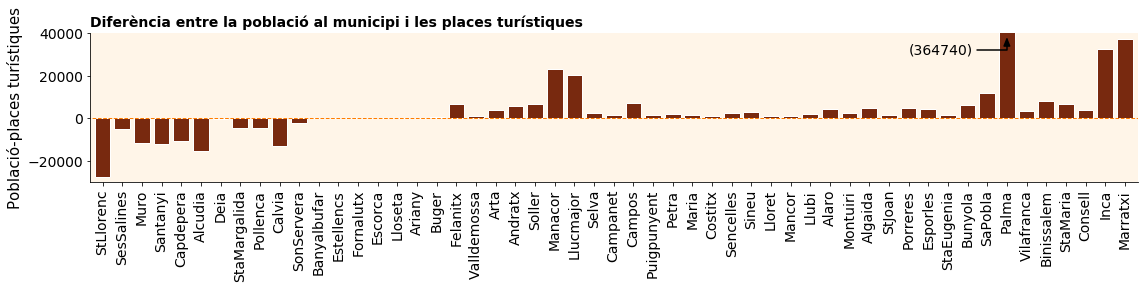

In [5]:
fig, ax = plt.subplots()

variable = 'diff_pc'
data.set_index('mun_name').sort_values('vp100p', ascending = False)[variable].plot.bar(figsize= (16,4),
                                                                                       ylim = (-3e4,4e4), width=0.8,
                                                                                       ax = ax, color = color3,
                                                                                       edgecolor = 'white')
ax.hlines(y=0, linewidth=1, xmin = -1000, xmax = 1000, color=color1, linestyles = 'dashed')

ax.annotate("(364740)", xy=(46, 39e3), xycoords='data', xytext=(41, 30e3), textcoords='data',
            size = textsize, 
            arrowprops=dict(arrowstyle="-|>, head_width=0.2, head_length=0.5",
                            color='black',lw =  1.5,connectionstyle="angle,angleA=180,angleB=-90,rad=0"))

ax.set_xlabel('')
ax.set_ylabel('Població-places turístiques', size = 15)
ax.tick_params(axis='both', which='major', labelsize=14)

ax.set_facecolor(background_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.ticklabel_format(style = 'sci', useMathText = True, axis = 'y', scilimits = (2,4))
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

plt.title('Diferència entre la població al municipi i les places turístiques', loc = 'left', fontsize = 14,fontweight="bold")

plt.subplots_adjust(top=2.9)
fig.tight_layout()

plt.savefig('./figs/figure_diff.png', dpi = 300, format = 'png')

In [6]:
# Area plot

# nrows = 6
# ncols = 9
# fig, ax = plt.subplots(nrows,ncols,figsize = (16,12))
# factor_s = 200
# for i in range(nrows):
#     for j in range(ncols):
#         index = j+ncols*i
#         if index < data.shape[0]:
#             size_hotel = data.iloc[index]['pc_hotel']
#             size_llvac = data.iloc[index]['pc_llvac']
#             size_pop = data.iloc[index]['pop_total']
            
#             zorder_pop = int(size_hotel > size_pop)

#             ax[i,j].set_xlim(-10,10)
#             ax[i,j].set_ylim(-10,10)
#             ax[i,j].scatter(0,0,s=factor_s,marker='s', zorder = zorder_pop)
#             ax[i,j].scatter(0,0,s=factor_s*size_hotel/size_pop, marker='s', c = 'blue',
#                             zorder = not zorder_pop)

#         ax[i,j].spines['top'].set_visible(False)
#         ax[i,j].spines['right'].set_visible(False)
#         ax[i,j].spines['bottom'].set_visible(False)
#         ax[i,j].spines['left'].set_visible(False)
#         ax[i,j].get_xaxis().set_visible(False)
#         ax[i,j].get_yaxis().set_visible(False)

Focus per tipus de placa i regions

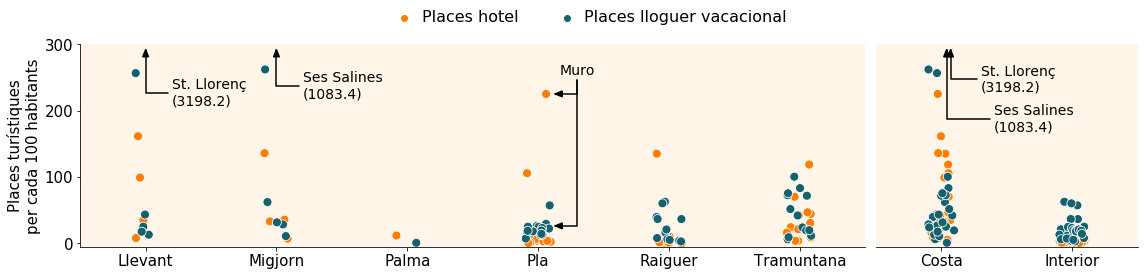

In [7]:
vars2compare = [ 'pc_hotel_p100p', 'pc_llvac_p100p']
categories = ['region_name', 'coast']

databox1 = pd.melt(data[categories + vars2compare],
                   id_vars = categories, value_vars = vars2compare)

databox1.variable = databox1.variable.replace({'pc_hotel_p100p': 'Places hotel',
                                               'pc_llvac_p100p': 'Places lloguer vacacional'})

#define subplots
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(16, 3.5))

sizedot = 9
linewidth = 0.8
edgecolor = 'white'

colors = [color1, color2, color3]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

sns.stripplot(x='region_name', y='value', hue="variable", size = sizedot, ax = ax[0],
             data=databox1, jitter=True, linewidth=linewidth, edgecolor=edgecolor)
sns.stripplot(x='coast', y='value', hue="variable", size = sizedot,legend=False, ax = ax[1],
                      data=databox1, jitter=True, linewidth=linewidth, edgecolor=edgecolor)

ylims = [-5, 300]

lgd = fig.legend(frameon=False, fontsize = 16, ncol = 2, handletextpad=0.1, 
                 bbox_to_anchor=(0.51, 0.94),loc = 'lower center')

ax[0].set_ylim(ylims)
ax[0].set_xlabel('')
ax[0].set_ylabel('Places turístiques\nper cada 100 habitants', size = 15)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].get_legend().remove()

ax[0].annotate("St. Llorenç\n(3198.2)", xy=(0, 298), xycoords='data', xytext=(0.2, 250), textcoords='data',
            size = textsize, zorder = 0, va = 'top',
            arrowprops=dict(arrowstyle="-|>, head_width=0.2, head_length=0.5",
                            color='black',lw =  1.5,connectionstyle="angle,angleA=180,angleB=-90,rad=0"),
            )

ax[0].annotate("Ses Salines\n(1083.4)", xy=(1, 298), xycoords='data', xytext=(1.2, 260), textcoords='data',
            size = textsize, zorder = 0, va = "top",
            arrowprops=dict(arrowstyle="-|>, head_width=0.2, head_length=0.5",
                            color='black',lw =  1.5,connectionstyle="angle,angleA=180,angleB=-90,rad=0"),
            )


exemple_Muro_xy_hotel = (3.1, 225.34)
exemple_Muro_xy_other = (3.1, 26.57)
exemple_Muro_xy_text = (3.3, 250)
ax[0].annotate("Muro", xy=exemple_Muro_xy_hotel, xycoords='data', xytext=exemple_Muro_xy_text, textcoords='data',
            size = textsize, zorder = 0, va = "bottom",ha='center')

ax[0].annotate("", xy=exemple_Muro_xy_hotel, xycoords='data', xytext=exemple_Muro_xy_text, textcoords='data',
            size = textsize, zorder = 0, va = "top",
            arrowprops=dict(arrowstyle="-|>, head_width=0.2, head_length=0.5",
                            color='black',lw =  1.5,connectionstyle="angle,angleA=-90,angleB=180,rad=0"))

ax[0].annotate("", xy=exemple_Muro_xy_other, xycoords='data', xytext=exemple_Muro_xy_text, textcoords='data',
            size = textsize, zorder = 0, va = "top",
            arrowprops=dict(arrowstyle="-|>, head_width=0.2, head_length=0.5",
                            color='black',lw =  1.5,connectionstyle="angle,angleA=-90,angleB=180,rad=0"))

ax[1].annotate("St. Llorenç\n(3198.2)", xy=(0.07, 298), xycoords='data', xytext=(0.3, 270), textcoords='data',
            size = textsize, zorder = 0, va = 'top',
            arrowprops=dict(arrowstyle="-|>, head_width=0.2, head_length=0.5",
                            color='black',lw =  1.5,connectionstyle="angle,angleA=180,angleB=-90,rad=0"),
            )

ax[1].annotate("Ses Salines\n(1083.4)", xy=(0.04, 298), xycoords='data', xytext=(0.4, 210), textcoords='data',
            size = textsize, zorder = 0, va = "top",
            arrowprops=dict(arrowstyle="-|>, head_width=0.2, head_length=0.5",
                            color='black',lw =  1.5,connectionstyle="angle,angleA=180,angleB=-90,rad=0"),
            )

for i in range(2):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].set_facecolor(background_color)

ax[1].set_ylim(ylims)
ax[1].spines['left'].set_visible(False)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].get_yaxis().set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=15)

fig.tight_layout()
#plt.show()

plt.savefig('./figs/figure_punts.png', dpi = 300, format = 'png', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [8]:
category = 'region_name'
                                
data_agg = data.groupby(category).agg({'pc_hotel':'sum',
                                       'pc_llvac':'sum',
                                       'pc_total':'sum',
                                       'pop_total':'sum',
                                       'superficie':'sum'})
data_agg['hotel_vp100p'] = data_agg.pc_hotel*100/data_agg.pop_total
data_agg['llvac_vp100p'] = data_agg.pc_llvac*100/data_agg.pop_total
data_agg['total_vp100p'] = data_agg.pc_total*100/data_agg.pop_total
data_agg['densitat_poblacio'] = data_agg.pop_total*100/data_agg.superficie

data_agg[["hotel_vp100p", "llvac_vp100p", "total_vp100p",'densitat_poblacio','pop_total']]

,hotel_vp100p,llvac_vp100p,total_vp100p,densitat_poblacio,pop_total
region_name,,,,,
Llevant,95.131767,21.726455,116.858223,133.883492,77523
Migjorn,51.470442,27.435033,78.905475,99.635976,80656
Palma,11.987858,1.037995,13.025853,2010.795115,419366
Pla,52.097328,21.750728,73.848056,98.888174,61483
Raiguer,20.510760,13.158980,33.669740,334.776973,143081
Tramuntana,69.296269,24.417269,93.713538,160.420526,112273


In [9]:
category = 'coast'
                                
data_agg = data.groupby(category).agg({'pc_hotel':'sum',
                                       'pc_llvac':'sum',
                                       'pc_total':'sum',
                                       'pop_total':'sum',
                                       'superficie' : 'sum'})
data_agg['hotel_vp100p'] = data_agg.pc_hotel*100/data_agg.pop_total
data_agg['llvac_vp100p'] = data_agg.pc_llvac*100/data_agg.pop_total
data_agg['total_vp100p'] = data_agg.pc_total*100/data_agg.pop_total
data_agg['densitat_poblacio'] = data_agg.pop_total*100/data_agg.superficie


data_agg[['hotel_vp100p', 'llvac_vp100p', 'total_vp100p', 'densitat_poblacio','pop_total']]

,hotel_vp100p,llvac_vp100p,total_vp100p,densitat_poblacio,pop_total
coast,,,,,
Costa,42.018330,11.596278,53.614608,306.242924,716523
Interior,2.048814,11.159964,13.208778,176.731822,177859


## Futur

Incloure renta, ocupacio turistica, mes de l'any, nivell d'urbanitzacio i transit

---------------------------------------------------------------------------------------

### Documentacio tecnica:

[Folium & Choropleths I](https://towardsdatascience.com/creating-choropleth-maps-with-pythons-folium-library-cfacfb40f56a)

[Folium & Choropleths II](http://python-visualization.github.io/folium/quickstart.html#Choropleth-maps)

### Dades:

[Geographical data](https://data.opendatasoft.com/explore/dataset/georef-spain-municipio%40public/export/?disjunctive.acom_code&disjunctive.acom_name&disjunctive.prov_code&disjunctive.prov_name&disjunctive.mun_code&disjunctive.mun_name&refine.acom_name=Illes+Balears)

[Population data (INE)](https://www.ine.es/jaxiT3/Datos.htm?t=2860)

[Superficie data](https://ibestat.caib.es/ibestat/estadistiques/03a35e8a-3b8b-4999-893d-fe9f7a095744/0fbc6d98-9ecf-493e-9006-e068125395da/es/U450001_0001.px)

[Renta](https://www.ine.es/jaxiT3/Datos.htm?t=30887)